# 아디다스 미국 판매 데이터 분석 및 영업이익 제고 전략 수립

2024.01.07

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 아디다스 미국 판매 데이터 분석 및 영업이익 제고 전략 수립
- 설명: 미국에서 수집된 아디다스 판매 데이터를 바탕으로 영업이익을 제고하기 위한 판매 전략 수립
- 사용한 데이터셋
    - [Adidas Sales Dataset](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/data): 아디다스 판매 유닛 수, 총 판매 수익, 판매 위치, 판매된 제품의 유형, 기타 다른 관련 정보들을 담은 데이터셋
- 진행 절차 및 내용
    - 데이터 로딩, 컬럼별 EDA
    - ...
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

...

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pickle

In [19]:
adidas_df = pd.read_excel('Adidas US Sales Datasets.xlsx', header=4).drop('Unnamed: 0', axis=1)

In [22]:
adidas_df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [23]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [24]:
adidas_df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 분포 확인(소매점)

In [25]:
adidas_df['Retailer'].value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64

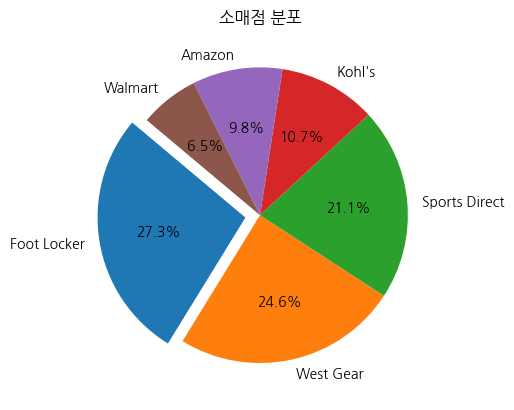

In [34]:
plt.pie(
    adidas_df['Retailer'].value_counts(),
    explode=[0.1 if i == 0 else 0 for i in range(len(adidas_df['Retailer'].unique()))],
    autopct='%.1f%%',
    labels=adidas_df['Retailer'].value_counts().index,
    startangle=140
)

plt.title('소매점 분포')
plt.show()

Foot Locker, West Gear, Sports Direct의 비중이 크다.

In [37]:
adidas_df[['Retailer', 'Retailer ID']].value_counts()

Retailer       Retailer ID
Foot Locker    1185732        2018
West Gear      1128299        1164
Sports Direct  1185732         962
Amazon         1185732         949
West Gear      1185732         916
Sports Direct  1197831         789
Foot Locker    1128299         515
Kohl's         1189833         360
Walmart        1197831         300
West Gear      1197831         294
Kohl's         1185732         288
Sports Direct  1128299         281
Kohl's         1128299         216
Walmart        1128299         194
Kohl's         1197831         166
Walmart        1185732         132
Foot Locker    1197831         104
dtype: int64

In [38]:
adidas_df['Retailer ID'].value_counts()

1185732    5265
1128299    2370
1197831    1653
1189833     360
Name: Retailer ID, dtype: int64

Retailer ID가 대체 뭐지...?

#### 2-2-2. 컬럼별 분포 확인(지역)

In [42]:
adidas_df['Region'].value_counts()

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64

In [76]:
sales_by_region = adidas_df.groupby('Region').agg({'Total Sales': 'sum', 'Operating Profit': 'sum', 'Units Sold': 'sum'})
sales_by_region

,Total Sales,Operating Profit,Units Sold
Region,,,
Midwest,135800459.0,52811346.48,391337
Northeast,186324067.0,68020587.65,501279
South,144663181.0,61138004.07,492260
Southeast,163171236.0,60555416.70,407000
West,269943182.0,89609406.55,686985


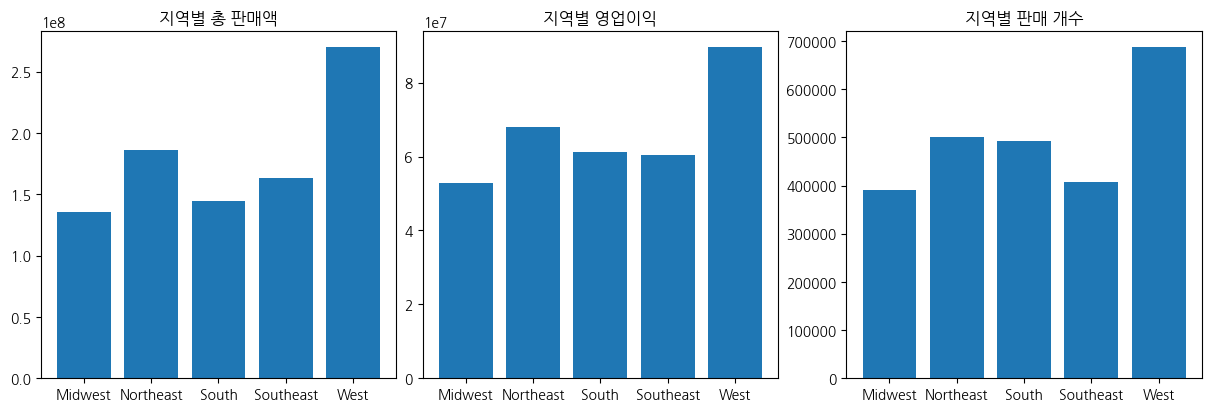

In [83]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), constrained_layout=True)

axes[0].bar(
    sales_by_region.index,
    sales_by_region['Total Sales']
)
axes[0].set_title('지역별 총 판매액')

axes[1].bar(
    sales_by_region.index,
    sales_by_region['Operating Profit']
)
axes[1].set_title('지역별 영업이익')

axes[2].bar(
    sales_by_region.index,
    sales_by_region['Units Sold']
)
axes[2].set_title('지역별 판매 개수')

plt.show()

지역별 실적을 보면 **서부가 가장 높고**, 중서부가 가장 낮다. 북동부, 남부, 남동부는 비슷한 편인데 이때 남동부는 남부에 비해 판매액이 많지만, 실질 영업이익은 적은 점을 확인할 수 있다.

#### 2-2-3. 컬럼별 분포 확인(판매 데이터)

In [49]:
adidas_df[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']].describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


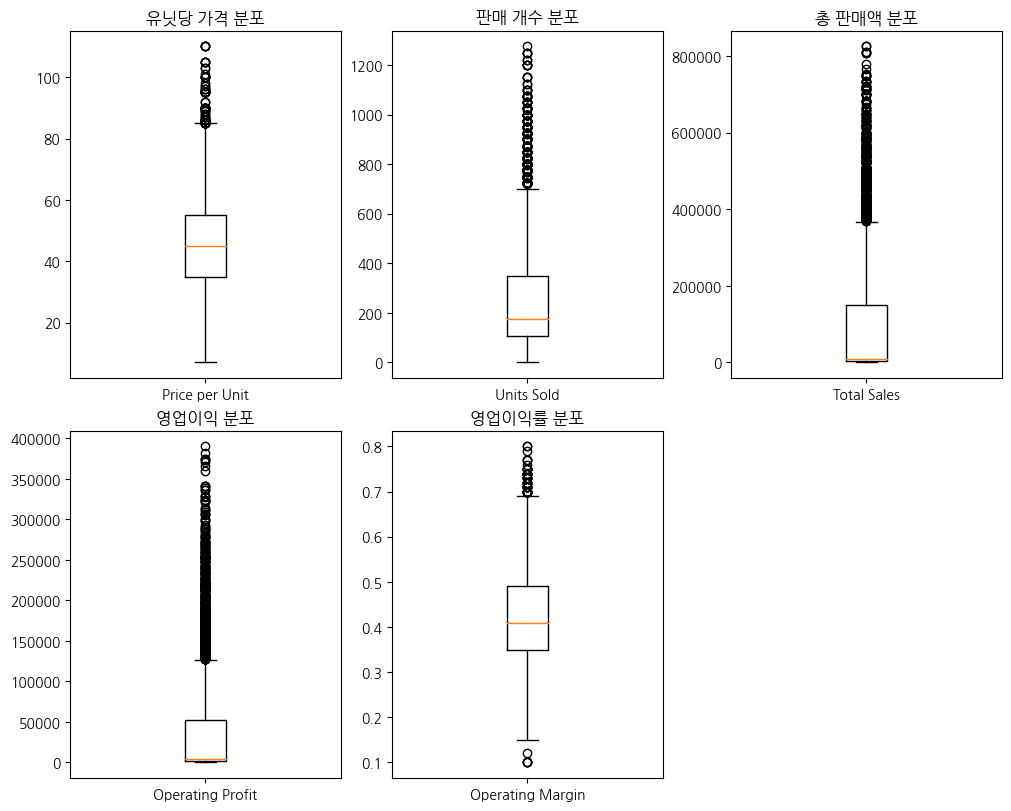

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8), constrained_layout=True)

axes[0][0].boxplot(adidas_df['Price per Unit'], labels=['Price per Unit'])
axes[0][0].set_title('유닛당 가격 분포')

axes[0][1].boxplot(adidas_df['Units Sold'], labels=['Units Sold'])
axes[0][1].set_title('판매 개수 분포')

axes[0][2].boxplot(adidas_df['Total Sales'], labels=['Total Sales'])
axes[0][2].set_title('총 판매액 분포')

axes[1][0].boxplot(adidas_df['Operating Profit'], labels=['Operating Profit'])
axes[1][0].set_title('영업이익 분포')

axes[1][1].boxplot(adidas_df['Operating Margin'], labels=['Operating Margin'])
axes[1][1].set_title('영업이익률 분포')

axes[1][2].set_xticks([])
axes[1][2].set_yticks([])
axes[1][2].spines['top'].set_visible(False)
axes[1][2].spines['right'].set_visible(False)
axes[1][2].spines['bottom'].set_visible(False)
axes[1][2].spines['left'].set_visible(False)

plt.show()

#### 2-2-4. 컬럼별 분포 확인(판매 방법)

In [84]:
adidas_df['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

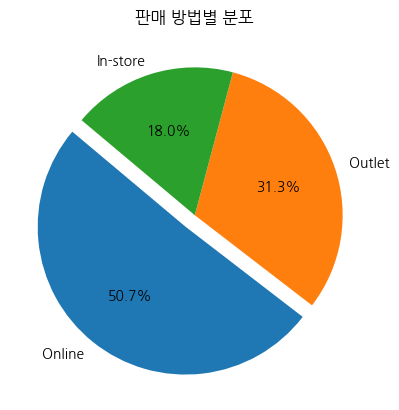

In [90]:
plt.pie(
    adidas_df['Sales Method'].value_counts(),
    explode=[0.1 if i==0 else 0 for i in range(len(adidas_df['Sales Method'].unique()))],
    labels=adidas_df['Sales Method'].value_counts().index,
    autopct='%.1f%%',
    startangle=140
)

plt.title('판매 방법별 분포')
plt.show()

In [91]:
sales_by_method = adidas_df.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum', 'Units Sold': 'sum'})
sales_by_method

,Total Sales,Operating Profit,Units Sold
Sales Method,,,
In-store,356643750.0,1.275913e+08,689990
Online,247672882.0,9.655518e+07,939093
Outlet,295585493.0,1.079883e+08,849778


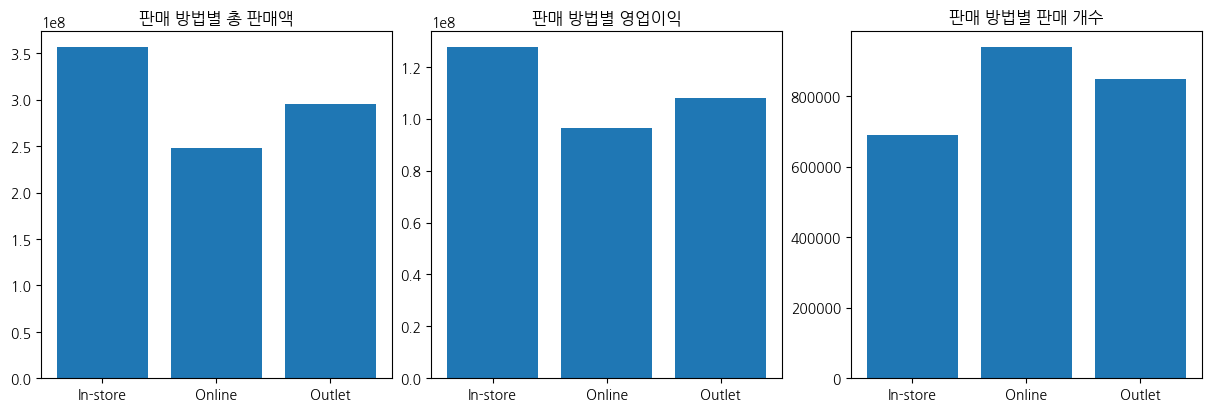

In [92]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), constrained_layout=True)

axes[0].bar(
    sales_by_method.index,
    sales_by_method['Total Sales']
)
axes[0].set_title('판매 방법별 총 판매액')

axes[1].bar(
    sales_by_method.index,
    sales_by_method['Operating Profit']
)
axes[1].set_title('판매 방법별 영업이익')

axes[2].bar(
    sales_by_method.index,
    sales_by_method['Units Sold']
)
axes[2].set_title('판매 방법별 판매 개수')

plt.show()

판매 개수는 온라인이 가장 높다. 그런데 온라인이 **영업이익이 가장 낮다.** 접근성 좋은 온라인의 장점, 배송 비용 등의 코스트가 발생하는 온라인의 단점을 잘 보여주는 사례인 것 같다.

In [95]:
# pickle로 저장
with open('adidas_df.pkl', 'wb') as file:
    pickle.dump(adidas_df, file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

아디다스의 전략 분석 팀에서는 영업이익 제고를 위한 전략을 수립하고자 한다. 이를 위해 풀어야 할 문제는 다음과 같다.
- **가장 높은 영업이익**을 기대할 수 있는 판매 지역, 판매 방법은 무엇인가?

이를 위해 다음과 같은 접근법을 이용한다.
- 판매 지역별 영업이익 평균에 대한 t검정 수행
- 판매 방법별 영업이익 평균에 대한 t검정 수행

### 3-2. 데이터 분석

### 3-3. 결과 해석

내용

---

## 4. 후기

내용